In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import EDA
EDA

EDA lib ready


<module 'EDA' from 'f:\\Programacion\\1.BOOTCAMP\\Proyectos\\Oceans_7_Project\\EDA.py'>

In [3]:
def name_change (df):
       col_names = ['index', 'date', 'time', 'duration', 'source',
              'src_port', 'src_geo', 'destination', 'dest_port',
              'dest_geo', 'protocol', 'length', 'request_method', 'info']

       if len(df.columns) == len (col_names):
              df.columns = col_names
       else:
              print(f'Longitud erronea: {len(df.columns)} del df contra {len (col_names)} de la lista')
              pass
       return df.columns

In [4]:
hydra = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\trabajo_interdisciplinar\ataques\Hydra_exito_Metasesplotable2_DV_09_07_20.csv')
hydra.head(1)

,No.,Arrival Time,Time,Time delta from previous captured frame,Source,Source Port,Source GeoIP,Destination,Destination Port,Destination GeoIP,Protocol,Length,Request Method,Info
0,1,"Jul 9, 2020 11:53:48.527015593 CEST",0.0,0.0,10.0.2.6,33362,NaN,10.0.2.8,21,NaN,TCP,74,NaN,33362 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...


In [5]:
hydra_fail = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\trabajo_interdisciplinar\ataques\Hydra_fallido_Metasesplotable2_DV_09_07_20.csv')
hydra_fail.head(1)

,No.,Arrival Time,Time,Time delta from previous captured frame,Source,Source Port,Source GeoIP,Destination,Destination Port,Destination GeoIP,Protocol,Length,Request Method,Info
0,1,"Jul 9, 2020 11:43:30.326855634 CEST",0.0,0.0,VMware_b3:7b:cc,NaN,NaN,Broadcast,NaN,NaN,ARP,42,NaN,Who has 10.0.2.8? Tell 10.0.2.6


# Hydra exitosos (hydra)

In [6]:
hydra.columns = name_change(hydra)

In [7]:
EDA.general_info(hydra)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 14 columns):
index             904 non-null int64
date              904 non-null object
time              904 non-null float64
duration          904 non-null float64
source            904 non-null object
src_port          904 non-null int64
src_geo           0 non-null float64
destination       904 non-null object
dest_port         904 non-null int64
dest_geo          0 non-null float64
protocol          904 non-null object
length            904 non-null int64
request_method    0 non-null float64
info              904 non-null object
dtypes: float64(5), int64(4), object(5)
memory usage: 99.0+ KB
None

Index(['index', 'date', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'info'],
      dtype='object')

(904, 14)

-Presence of NaNs in df-
index             False


In [8]:
# Creando columna de etiquetas fallidas (0) para modelo de ML
hydra.insert(loc= hydra.shape[1], column= 'label', value= 1)

# hydra_time

In [9]:
hydra_time = hydra[['index','date', 'time', 'duration']]
hydra_time

,index,date,time,duration
0,1,"Jul 9, 2020 11:53:48.527015593 CEST",0.000000,0.000000
1,2,"Jul 9, 2020 11:53:48.527071279 CEST",0.000056,0.000056
2,3,"Jul 9, 2020 11:53:48.527073035 CEST",0.000057,0.000002
3,4,"Jul 9, 2020 11:53:48.527265161 CEST",0.000250,0.000192
4,5,"Jul 9, 2020 11:53:48.527336716 CEST",0.000321,0.000072
...,...,...,...,...
899,900,"Jul 9, 2020 11:54:02.378211208 CEST",13.851196,0.000033
900,901,"Jul 9, 2020 11:54:02.378178413 CEST",13.851163,-0.000033
901,902,"Jul 9, 2020 11:54:02.378269837 CEST",13.851254,0.000091
902,903,"Jul 9, 2020 11:54:02.378632248 CEST",13.851617,0.000362


In [10]:
info_time = hydra_time['time'].describe()
info_time

count    904.000000
mean       7.043824
std        4.470644
min        0.000000
25%        3.716557
50%        6.941128
75%       10.022743
max       13.851625
Name: time, dtype: float64

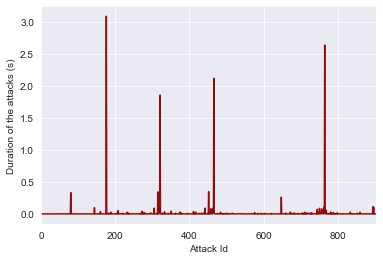

In [11]:
hydra_time['duration'].plot(colors = 'darkred', alpha = 0.95)
plt.xlabel('Attack Id')
plt.ylabel('Duration of the attacks (s)')
# fig.savefig('test.jpg')
plt.show()

In [12]:
hydra_time['duration'].describe()

count    904.000000
mean       0.015323
std        0.165878
min       -0.000147
25%        0.000010
50%        0.000105
75%        0.000461
max        3.091736
Name: duration, dtype: float64

# hydra_local

In [13]:
hydra_local = hydra[['index' , 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo']]
hydra_local.head(2)

,index,source,src_port,src_geo,destination,dest_port,dest_geo
0,1,10.0.2.6,33362,NaN,10.0.2.8,21,NaN
1,2,10.0.2.6,33364,NaN,10.0.2.8,21,NaN


In [14]:
EDA.null_count(hydra_local)

Presence of null in clolumns:
index          False
source         False
src_port       False
src_geo         True
destination    False
dest_port      False
dest_geo        True
dtype: bool

Number of null in columns:
index            0
source           0
src_port         0
src_geo        904
destination      0
dest_port        0
dest_geo       904
dtype: int64


In [15]:
EDA.value_counter(hydra_local)


index:
904    1
283    1
309    1
308    1
307    1
      ..
599    1
598    1
597    1
596    1
1      1
Name: index, Length: 904, dtype: int64
----------------

source:
10.0.2.6    479
10.0.2.8    425
Name: source, dtype: int64
----------------

src_port:
21       425
33374     18
33386     18
33384     18
33382     18
33380     18
33378     18
33390     18
33376     18
33372     18
33370     18
33368     18
33366     18
33364     18
33362     18
33388     18
33394     17
33396     15
33392     14
33426     11
33400     11
33402     11
33404     11
33406     11
33410     11
33412     11
33414     11
33416     11
33418     11
33420     11
33422     11
33424     11
33398     10
33428     10
Name: src_port, dtype: int64
----------------

src_geo:
Series([], Name: src_geo, dtype: int64)
----------------

destination:
10.0.2.8    479
10.0.2.6    425
Name: destination, dtype: int64
----------------

dest_port:
21       479
33374     17
33386     17
33384     17
33382     17
33380     17
3

# hydra_protocol

In [16]:
hydra.columns

Index(['index', 'date', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'info', 'label'],
      dtype='object')

In [17]:
hydra_protocol = hydra[['index', 'protocol', 'length', 'request_method', 'info']]
hydra_protocol.head()

,index,protocol,length,request_method,info
0,1,TCP,74,NaN,33362 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
1,2,TCP,74,NaN,33364 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
2,3,TCP,74,NaN,33366 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
3,4,TCP,74,NaN,33368 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
4,5,TCP,74,NaN,33370 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...


In [18]:
EDA.null_count(hydra_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index               0
protocol            0
length              0
request_method    904
info                0
dtype: int64


In [19]:
EDA.value_counter(hydra_protocol)


index:
904    1
283    1
309    1
308    1
307    1
      ..
599    1
598    1
597    1
596    1
1      1
Name: index, Length: 904, dtype: int64
----------------

protocol:
TCP    539
FTP    365
Name: protocol, dtype: int64
----------------

length:
66     395
100     67
74      66
88      64
54      50
81      38
77      36
80      33
86      33
60      28
78      21
76      18
96      18
68      14
84      11
108      9
89       3
Name: length, dtype: int64
----------------

request_method:
Series([], Name: request_method, dtype: int64)
----------------

info:
Response: 331 Please specify the password.                                                                     67
Response: 530 Login incorrect.                                                                                 64
Response: 220 (vsFTPd 2.3.4)                                                                                   33
Response: vsf_sysutil_recv_peek: no data                                                

In [20]:
methods_info = hydra_protocol['request_method'].value_counts()
blanks = len(hydra.index) - methods_info.sum()
per = round(blanks*100 / len(hydra.index), 2)
methods_info, blanks

(Series([], Name: request_method, dtype: int64), 904)

In [21]:
if methods_info.sum() > 0:   
    # data
    methods_info.plot(kind='bar', colors = ['darkgreen', 'yellow', 'darkblue'], alpha = 0.95)

    # plot
    plt.title('Request Methods number')
    plt.xticks(rotation = -360)

    plt.show()
    print(f'Aún faltan {blanks} métodos de los {len(hydra.index)} registros proporcionados ({per}%)')
else:
    print(f'Toda la columna vacía ({blanks} entradas)')

Toda la columna vacía (904 entradas)


In [22]:
hydra_protocol['info'].value_counts().head(20)

Response: 331 Please specify the password.           67
Response: 530 Login incorrect.                       64
Response: 220 (vsFTPd 2.3.4)                         33
Response: vsf_sysutil_recv_peek: no data             18
Response: 500 OOPS:                                  18
Request: USER postgres                               14
Response:                                            14
Request: USER tuputamadre                            11
Request: PASS tumadre2                               10
Request: PASS 5556                                   10
Request: PASS msfadmin                               10
Request: PASS dahdsac                                10
Request: USER user                                   10
Request: PASS user                                    9
Request: PASS postgres. perico el de los paalotes     9
Request: PASS service                                 9
Request: USER 55664                                   7
Request: USER admin                             

# Hydra fallidos (hydra_fail)

In [23]:
hydra_fail.columns = name_change(hydra_fail)

In [24]:
EDA.general_info(hydra_fail)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20104 entries, 0 to 20103
Data columns (total 14 columns):
index             20104 non-null int64
date              20104 non-null object
time              20104 non-null float64
duration          20104 non-null float64
source            20104 non-null object
src_port          20081 non-null float64
src_geo           0 non-null float64
destination       20104 non-null object
dest_port         20081 non-null float64
dest_geo          0 non-null float64
protocol          20104 non-null object
length            20104 non-null int64
request_method    12 non-null object
info              20104 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 2.1+ MB
None

Index(['index', 'date', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'info'],
      dtype='object')

(20104, 14)

-Presence of NaNs 

In [25]:
# Creando columna de etiquetas fallidas (0) para modelo de ML
hydra_fail.insert(loc= hydra_fail.shape[1], column= 'label', value= 0)

# hydra_fail_time

In [26]:
hydra_fail_time = hydra_fail[['index','date', 'time', 'duration']]
hydra_fail_time

,index,date,time,duration
0,1,"Jul 9, 2020 11:43:30.326855634 CEST",0.000000,0.000000
1,2,"Jul 9, 2020 11:43:30.327485094 CEST",0.000629,0.000629
2,3,"Jul 9, 2020 11:43:30.327493560 CEST",0.000638,0.000008
3,4,"Jul 9, 2020 11:43:30.327522583 CEST",0.000667,0.000029
4,5,"Jul 9, 2020 11:43:30.327543367 CEST",0.000688,0.000021
...,...,...,...,...
20099,20100,"Jul 9, 2020 11:49:33.799549725 CEST",363.472694,0.000008
20100,20101,"Jul 9, 2020 11:49:33.809662690 CEST",363.482807,0.010113
20101,20102,"Jul 9, 2020 11:49:33.809705102 CEST",363.482849,0.000042
20102,20103,"Jul 9, 2020 11:49:33.809855737 CEST",363.483000,0.000151


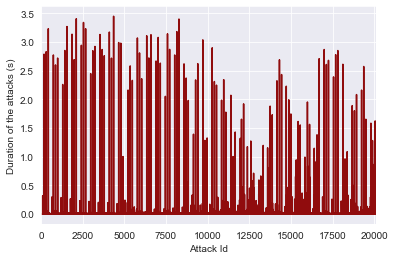

In [27]:
hydra_fail_time['duration'].plot(colors = 'darkred', alpha = 0.95)
plt.xlabel('Attack Id')
plt.ylabel('Duration of the attacks (s)')
# fig.savefig('test.jpg')
plt.show()

In [28]:
hydra_fail_time['duration'].describe()

count    20104.000000
mean         0.018080
std          0.177358
min         -0.000205
25%          0.000023
50%          0.000160
75%          0.003378
max          3.451327
Name: duration, dtype: float64

In [29]:
# comparación con hydra_time

diff = round(((hydra_fail_time['duration'].mean() / hydra_time['duration'].mean())-1)*100, 2)
print(f'{diff}% de diferencia. La media de duración de los ataques fallidos es más elevada.')

18.0% de diferencia. La media de duración de los ataques fallidos es más elevada.


# hydra_fail_local

In [30]:
hydra_fail_local = hydra_fail[['index' , 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo']]
hydra_fail_local.head(2)

,index,source,src_port,src_geo,destination,dest_port,dest_geo
0,1,VMware_b3:7b:cc,NaN,NaN,Broadcast,NaN,NaN
1,2,VMware_f3:ea:07,NaN,NaN,VMware_b3:7b:cc,NaN,NaN


In [31]:
EDA.null_count(hydra_fail_local)

Presence of null in clolumns:
index          False
source         False
src_port        True
src_geo         True
destination    False
dest_port       True
dest_geo        True
dtype: bool

Number of null in columns:
index              0
source             0
src_port          23
src_geo        20104
destination        0
dest_port         23
dest_geo       20104
dtype: int64


In [32]:
EDA.value_counter(hydra_fail_local)


index:
2047     1
2724     1
4759     1
19100    1
17053    1
        ..
17730    1
19779    1
5448     1
7497     1
2049     1
Name: index, Length: 20104, dtype: int64
----------------

source:
10.0.2.6           10332
10.0.2.8            9751
10.0.2.1              13
VMware_c0:00:08        6
VMware_f3:ea:07        1
VMware_b3:7b:cc        1
Name: source, dtype: int64
----------------

src_port:
21.0       9749
60914.0      21
33138.0      18
33150.0      18
33148.0      18
           ... 
33344.0      14
33352.0      14
33354.0      14
33356.0      14
33360.0      14
Name: src_port, Length: 577, dtype: int64
----------------

src_geo:
Series([], Name: src_geo, dtype: int64)
----------------

destination:
10.0.2.8           10332
10.0.2.6            9749
239.255.255.250       12
Broadcast              7
10.0.2.255             2
VMware_b3:7b:cc        1
224.0.0.251            1
Name: destination, dtype: int64
----------------

dest_port:
21.0       10332
60914.0       20
33136.0      

# hydra_fail_protocol

In [33]:
hydra_fail_protocol = hydra_fail[['index', 'protocol', 'length', 'request_method', 'info']]
hydra_fail_protocol.head()

,index,protocol,length,request_method,info
0,1,ARP,42,NaN,Who has 10.0.2.8? Tell 10.0.2.6
1,2,ARP,60,NaN,10.0.2.8 is at 00:0c:29:f3:ea:07
2,3,TCP,74,NaN,60416 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
3,4,TCP,74,NaN,60414 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
4,5,TCP,74,NaN,60412 > 21 [SYN] Seq=0 Win=64240 Len=0 MSS=1...


In [34]:
EDA.null_count(hydra_fail_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index                 0
protocol              0
length                0
request_method    20092
info                  0
dtype: int64


In [35]:
EDA.value_counter(hydra_fail_protocol)


index:
2047     1
2724     1
4759     1
19100    1
17053    1
        ..
17730    1
19779    1
5448     1
7497     1
2049     1
Name: index, Length: 20104, dtype: int64
----------------

protocol:
TCP        12042
FTP         8039
SSDP          12
ARP            8
BROWSER        2
MDNS           1
Name: protocol, dtype: int64
----------------

length:
66     9728
79     2974
100    1719
88     1718
74     1152
60     1127
86      577
80      430
81      266
78      143
82      124
83       48
54       42
216      12
76       12
96       11
84       10
68        6
77        2
42        1
286       1
257       1
Name: length, dtype: int64
----------------

request_method:
M-SEARCH    12
Name: request_method, dtype: int64
----------------

info:
Request: USER 123456                                                              2279
Response: 331 Please specify the password.                                        1719
Response: 530 Login incorrect.                                          

In [36]:
methods_info_fail = hydra_fail_protocol['request_method'].value_counts()
blanks = len(hydra_fail.index) - methods_info.sum()
per = round(blanks*100 / len(hydra.index), 2)
methods_info, blanks

(Series([], Name: request_method, dtype: int64), 20104)

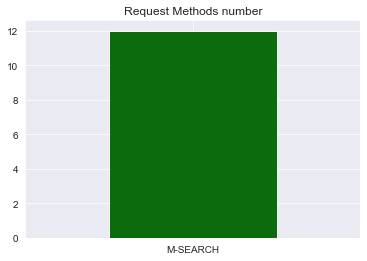

Aún faltan 20104 métodos de los 20104 registros proporcionados (2223.89%)


In [37]:
if methods_info_fail.sum() > 0:   
    # data
    methods_info_fail.plot(kind='bar', colors = ['darkgreen', 'yellow', 'darkblue'], alpha = 0.95)

    # plot
    plt.title('Request Methods number')
    plt.xticks(rotation = -360)

    plt.show()
    print(f'Aún faltan {blanks} métodos de los {len(hydra_fail.index)} registros proporcionados ({per}%)')
else:
    print(f'Toda la columna vacía ({blanks} entradas)')

In [38]:
hydra_fail_protocol['info'].value_counts().head(20)


Request: USER 123456                          2279
Response: 331 Please specify the password.    1719
Response: 530 Login incorrect.                1717
Response: 220 (vsFTPd 2.3.4)                   576
M-SEARCH * HTTP/1.1                             12
Response: 500 OOPS:                             12
Response: vsf_sysutil_recv_peek: no data        11
Response:                                        6
Who has 192.168.1.1? Tell 10.0.2.1               6
33340  >  21 [RST] Seq=72 Win=0 Len=0            4
33348  >  21 [RST] Seq=53 Win=0 Len=0            3
33358  >  21 [RST] Seq=54 Win=0 Len=0            3
33356  >  21 [RST] Seq=55 Win=0 Len=0            3
33350  >  21 [RST] Seq=58 Win=0 Len=0            3
33346  >  21 [RST] Seq=56 Win=0 Len=0            3
33360  >  21 [RST] Seq=56 Win=0 Len=0            3
33354  >  21 [RST] Seq=55 Win=0 Len=0            3
33342  >  21 [RST] Seq=70 Win=0 Len=0            3
21  >  32920 [RST] Seq=190 Win=0 Len=0           2
21  >  33016 [RST] Seq=190 Win=

In [39]:
win_protocols = hydra['protocol'].value_counts()
fail_protocols = hydra_fail['protocol'].value_counts()
print(f'Win protocols:\n{win_protocols}\n\nFail protocols:\n{fail_protocols}')

Win protocols:
TCP    539
FTP    365
Name: protocol, dtype: int64

Fail protocols:
TCP        12042
FTP         8039
SSDP          12
ARP            8
BROWSER        2
MDNS           1
Name: protocol, dtype: int64


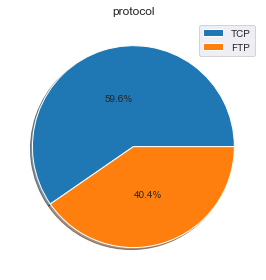

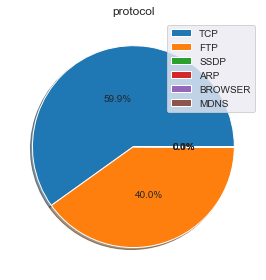

In [40]:
EDA.plot_pie(win_protocols), EDA.plot_pie(fail_protocols);